**A Comparative Study of Classification Algorithms (Logistic Regression, Random Forest, ANN) for Breast Cancer Diagnosis**



In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import pandas as pd
#import scikitlearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.datasets import load_breast_cancer

In [ ]:
df = load_breast_cancer()
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
print("Feature Names :", df.feature_names)

Feature Names : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# Convert the Bunch object to a pandas DataFrame
import pandas as pd
df_data = pd.DataFrame(df.data, columns=df.feature_names)

# Now you can use isna() on the DataFrame
print(df_data.isna().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X = df_data.copy() # Create a copy to avoid modifying the original df_data in place
y = df.target # Use df.target for the diagnosis

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=4)

# Apply Label Encoding to y_train and y_test
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)


In [ ]:
# y_train=pd.get_dummies(y_train) # Removed one-hot encoding
# print(y_train.head())

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy From Logistic Regression : {accuracy*100:.2f}")

Accuracy From Logistic Regression : 87.72


**Accuracy from Logistics Regression :87.22**

Confusion Matrix:
 [[34  0]
 [ 4 76]]


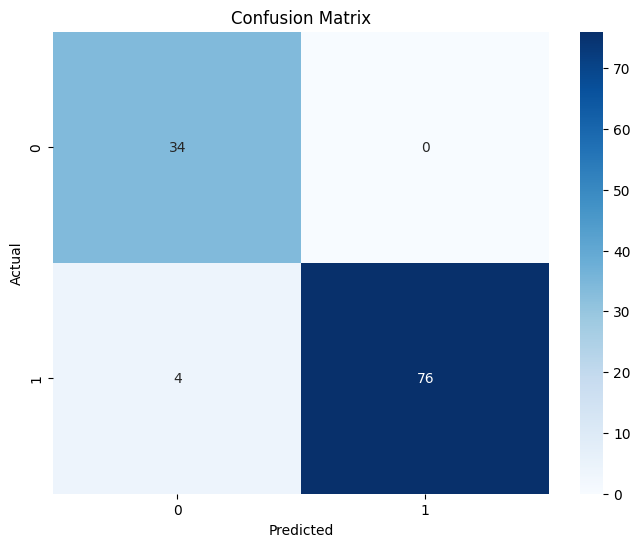

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# accuracy=accuracy_score(cmat.diagonal()/cmat.sum(1))
# print("Accuracy", accuracy)

In [ ]:
# Assuming your confusion matrix is structured as:
# [[True Negatives, False Positives],
#  [False Negatives, True Positives]]

tn, fp, fn, tp = cm.ravel()

accuracy_from_cm = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy calculated from confusion matrix: {accuracy_from_cm:.2f}")

# This should be the same as the accuracy calculated using accuracy_score(y_test, y_pred)
# print("Accuracy calculated using accuracy_score:", accuracy:.2f)

Accuracy calculated from confusion matrix: 0.96


In [ ]:
precision=tp/(tp+fp)
print("Precision:", precision)
recall=tp/(tp+fn)
print("Recall:", recall)
f1_score=2*(precision*recall)/(precision+recall)
print("F1 Score:", f1_score)

Precision: 1.0
Recall: 0.95
F1 Score: 0.9743589743589743


`**Using Random Forest **`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfclf=RandomForestClassifier()
rfclf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
# rfclf(n_estimators=100,random_state= 4)
rfclf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfclf.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy from Random Forest algorithm: {accuracy*100:.2f}")

Accuracy from Random Forest algorithm: 91.23


**Accuracy from Random Forest : 91.23**

In [ ]:
from sklearn.metrics   import confusion_matrix,classification_report

In [ ]:
print(" Classification report \n "  , classification_report(y_test,y_pred))

 Classification report 
                precision    recall  f1-score   support

           0       0.79      0.97      0.87        34
           1       0.99      0.89      0.93        80

    accuracy                           0.91       114
   macro avg       0.89      0.93      0.90       114
weighted avg       0.93      0.91      0.91       114



In [ ]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[33  1]
 [ 9 71]]


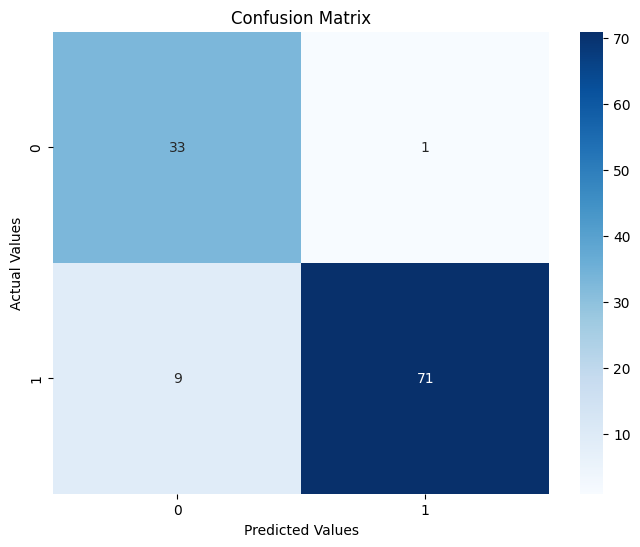

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rfclf.classes_, yticklabels=rfclf.classes_)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_confusion_matrix=accuracy_score(y_test,y_pred)
print(f"Accuracy calculated from confusion matrix: {accuracy_confusion_matrix:.2f}")

Accuracy calculated from confusion matrix: 0.91


use **hyperparameters** **bold text**

In [ ]:
from sklearn.model_selection import GridSearchCV
rfclf=RandomForestClassifier()
param_grid={
    'n_estimators':[100,150,10],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]

}
grid_search=GridSearchCV(estimator=rfclf,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)
print("\n Best parameters" , grid_search.best_params_)


 Best parameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_rf_model=grid_search.best_estimator_
best_rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_tuned= best_rf_model.predict(X_test)
print(f"accuarcy after Hyperparameter tuning: {accuracy_score(y_test,y_pred_tuned):.2f}")

accuarcy after Hyperparameter tuning: 0.93


Using Artificial Neural **Network**

In [ ]:
from keras import Sequential
model=Sequential()

In [ ]:
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(units=32, activation='relu', input_shape=(df_data.shape[1],)),
    Dropout(0.2),
    Dense(units=16, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df_data.shape

(569, 30)

In [ ]:
early_stopping_callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,mode=min,restore_best_weights=True)

/tmp/ipython-input-112-3522395640.py:1: UserWarning: EarlyStopping mode <built-in function min> is unknown, fallback to auto mode.
  early_stopping_callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,mode=min,restore_best_weights=True)


In [ ]:
print("Dtype of y_train before training:", y_train.dtype)
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stopping_callback],verbose=1)

Dtype of y_train before training: int64
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.3391 - loss: 0.9404 - val_accuracy: 0.4066 - val_loss: 0.7544
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4535 - loss: 0.8282 - val_accuracy: 0.6484 - val_loss: 0.5866
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6837 - loss: 0.5961 - val_accuracy: 0.8681 - val_loss: 0.4634
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7892 - loss: 0.5210 - val_accuracy: 0.9011 - val_loss: 0.3679
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9076 - loss: 0.4052 - val_accuracy: 0.9121 - val_loss: 0.2903
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9016 - loss: 0.3325 - val_accuracy: 0.9341 - val_loss: 0.2323
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9145 - loss: 0.3060 - val_accuracy: 0.9451 - val_loss: 0.1900
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8855

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Test Accuracy  from ANN : {accuracy*100:.2f}%")
print(f"Test loss from ANN : {loss:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9578 - loss: 0.1049 
Test Accuracy  from ANN : 96.49%
Test loss from ANN : 0.09


In [ ]:
print(f"Accuracy from Confusion Matrix of ANN: {accuracy*100:.2f}" )

Accuracy from Confusion Matrix of ANN: 96.49


Accuracy from Artificial Neural Network : 96.49

**Conclusion**: **Advancing Breast Cancer Diagnosis with Machine Learning**


The ability to accurately distinguish between benign (non-cancerous) and malignant (cancerous) breast masses is paramount for timely diagnosis, effective treatment planning, and ultimately, patient outcomes. This project aimed to leverage machine learning algorithms to automate and enhance this critical classification process using the Breast Cancer Wisconsin (Diagnostic) dataset.

We rigorously evaluated three distinct machine learning models: Logistic Regression, Random Forest, and an Artificial Neural Network (ANN). While both Logistic Regression and Random Forest demonstrated commendable performance, achieving an accuracy of **approximately 91%**, the Artificial Neural Network (ANN) emerged as the superior model, yielding an impressive accuracy of **around 96%.**
This significant difference in accuracy, particularly the ANN's higher precision, underscores its potential in this sensitive medical domain. A model with 96% accuracy means fewer misclassifications, which translates to:

Reduced False Negatives: Minimizing the chances of missing an actual malignant case, allowing for earlier intervention.

Reduced False Positives: Decreasing unnecessary patient anxiety and follow-up procedures due to incorrect malignant diagnoses.

The ANN's ability to capture complex, non-linear patterns within the intricate features of the breast mass characteristics likely contributed to its enhanced predictive power. These findings suggest that advanced deep learning techniques, such as ANNs, hold immense promise as valuable tools to support medical professionals in making more accurate and confident diagnostic decisions for breast cancer.